In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
pop = df['Sales']
pop.mean()

14.0225

In [25]:
import numpy as np

In [32]:
sampled_data = df.sample(n=10,replace=True,random_state=42)
estimate1 = sampled_data['Sales'].mean()
estimate1

14.11

In [37]:
df['Sales'].sample(n=10,replace=True,random_state=42).mean()

14.11

In [28]:
sample_means = []
for i in range(1000):
    sampled_data = df.sample(n=10,replace=True)
    sample_means.append(sampled_data['Sales'].mean())
len(sample_means)
    
    

1000

(array([ 11.,  44., 107., 198., 229., 208., 123.,  55.,  20.,   5.]),
 array([ 9.57 , 10.532, 11.494, 12.456, 13.418, 14.38 , 15.342, 16.304,
        17.266, 18.228, 19.19 ]),
 <BarContainer object of 10 artists>)

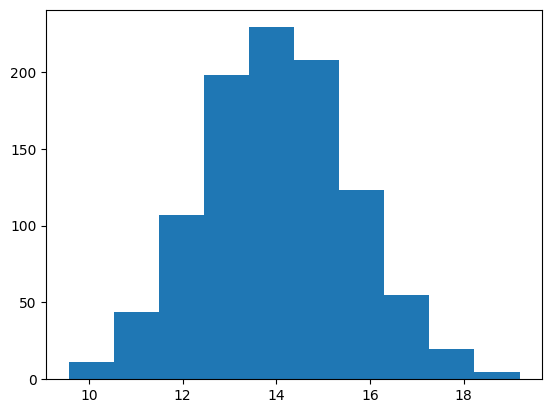

In [29]:
plt.hist(sample_means)

In [30]:
mean_sample_means = np.mean(sample_means)
mean_sample_means

14.026009999999998

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: xlabel='Newspaper'>

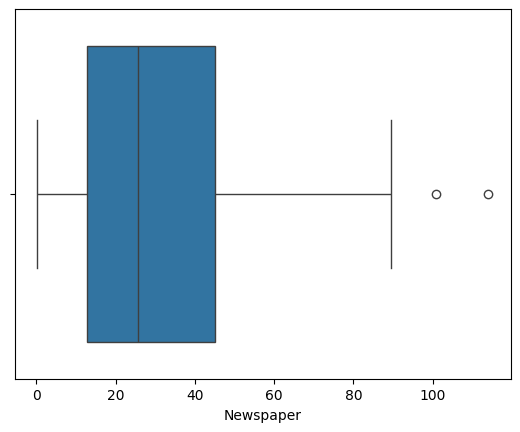

In [9]:
sns.boxplot(x=df['Newspaper'])

In [15]:
q1 = df['Newspaper'].quantile(0.25)
q3 = df['Newspaper'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5* iqr
upper_bound = q3 + 1.5 * iqr

<Axes: xlabel='Newspaper'>

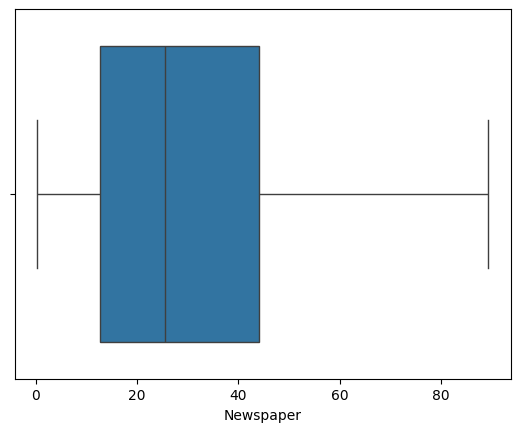

In [18]:
filtered_df = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]
sns.boxplot(x=filtered_df['Newspaper'])

In [47]:
x = filtered_df[['TV','Radio','Newspaper']]
y = filtered_df[['Sales']]


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)


In [59]:
model = LinearRegression()

In [60]:
model.fit(x_train,y_train)

LinearRegression()

In [61]:
y_pred = model.predict(x_test)

In [64]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse,r2,model.coef_,model.intercept_

(2.190766264441695,
 0.8966028371866206,
 array([[ 0.0459745 ,  0.18850428, -0.00555224]]),
 array([3.09116786]))

In [67]:
xx = sm.add_constant(x)


In [83]:
# Create the model
model = sm.OLS(y, xx)

# Fit the model
results = model.fit()


In [87]:
r = results.summary()
r

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           8.35e-95
Time:                        13:02:03   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9523      0.318      9.280      0.000       2.325       3.580
TV             0.0457      0.001     32.293      0.000       0.043       0.048
Radio          0.1886      0.009     21.772      0.000       0.171       0.206
Newspaper     -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""